# FAST-UAV - Fixed-Wing Design Optimization
*Author: Félix Pollet - 2023* <br>

This notebook provides an example of design optimization of a fixed-wing UAV. The process is the same as the one for multirotor UAVs, except that some models and variables are different (e.g., for defining the wing geometry).

## 1. Setting up and analyzing the initial problem

In [1]:
# Import required librairies
import os.path as pth
import openmdao.api as om
import logging
import warnings
import shutil
import fastoad.api as oad
from time import time
import matplotlib.pyplot as plt
from fastuav.utils.postprocessing.analysis_and_plots import *

# Declare paths to folders and files
DATA_FOLDER_PATH = "../data"
CONFIGURATIONS_FOLDER_PATH = "../configurations"
WORK_FOLDER_PATH = "./workdir"
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "problem_inputs_FW.xml")  # Source file provided for the example

# For having log messages display on screen
#logging.basicConfig(level=logging.INFO, format="%(levelname)-8s: %(message)s")
#warnings.filterwarnings(action="ignore")

# For using all screen width
from IPython.display import display, HTML, IFrame
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "configuration.yaml")
oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="fixedwing_mdo.yaml"
)

'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\configuration.yaml'

As you can see in the following N2 diagram, some models used for the fixed-wing UAV are (obviously) different from the multirotor ones. Have a look at the geometry discipline. The arms and body frame have been replaced by wings, tails, and a fuselage. The aerodynamics module also includes models for estimating the parasitic drag, among others.

In [3]:
N2_FILE = pth.join(WORK_FOLDER_PATH, "n2.html")
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width="100%", height="500px")

Once again, we generate a temporary input file for this notebook, so that the reference source file cannot be corrupted:

In [4]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\problem_inputs.xml'

The [problem_inputs.xml](./workdir/problem_inputs.xml) file now includes parameters such as the material properties for the spars and the ribs of the wing. Take your time to check these parameters specific to fixed-wing UAVs.

In [5]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_inputs.xml")
oad.variable_viewer(INPUT_FILE)

## 2. Running an MDO

You can now run an optimization problem. Here again, some design variables and constraints defined in the [configuration file](./workdir/configuration.yaml) are specific to fixed-wing UAVs. For example:

```yaml
optimization:
  design_variables:
    - name: data:geometry:wing:loading:k  # under estimation coefficient on the wing loading
      lower: 0.1
      upper: 1.0
    - name: data:geometry:wing:AR  # aspect ratio of the wing
      lower: 8.0
      upper: 20.0
  constraints:
    - name: data:geometry:fuselage:volume:constraint  # fuselage volume requirement (to carry the batteries and the payload)
      lower: 0.0
```

In [6]:
optim_problem = oad.optimize_problem(CONFIGURATION_FILE, overwrite=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1582250883983306
            Iterations: 78
            Function evaluations: 91
            Gradient evaluations: 77
Optimization Complete
-----------------------------------


Let's save and visualize these results:

In [7]:
OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs.xml")
FW_OUTPUT_FILE = pth.join(DATA_FOLDER_PATH, 'problem_outputs_FW_mdo.xml')
shutil.copy(OUTPUT_FILE, FW_OUTPUT_FILE)

'../data\\problem_outputs_FW_mdo.xml'

In [8]:
oad.optimization_viewer(CONFIGURATION_FILE)

C:\Users\f.pollet.ISAE-SUPAERO\AppData\Roaming\Python\Python38\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [9]:
oad.variable_viewer(OUTPUT_FILE)

## 3. Analysis and plots

You can now use postprocessing plots to visualize the results of the MDO.

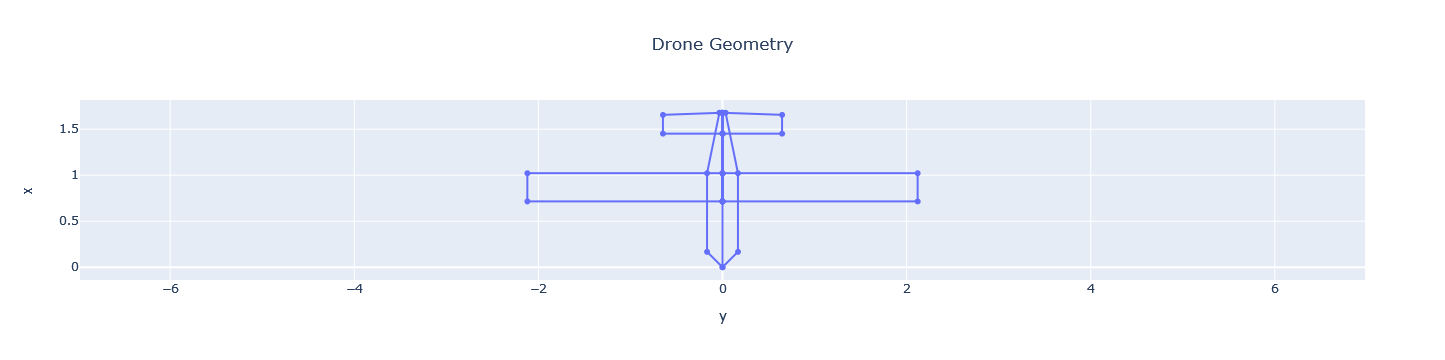

In [18]:
fig = fixedwing_geometry_plot(OUTPUT_FILE)
fig.show()

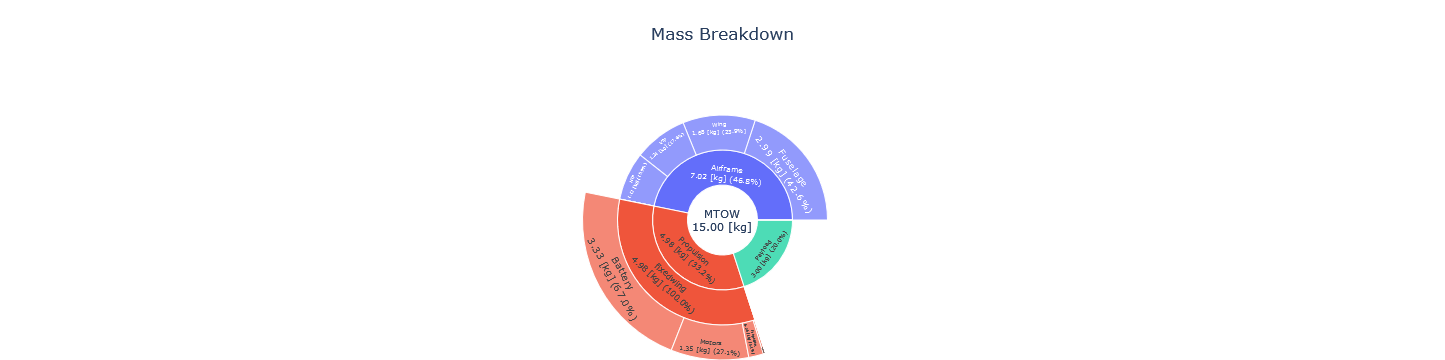

In [17]:
fig = mass_breakdown_sun_plot_drone(OUTPUT_FILE)
fig.show()